<a href="https://colab.research.google.com/github/ysurs/Telco-Churn-prediction/blob/main/telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/churn_project/archive.zip -d /content/drive/MyDrive/churn_project/

Archive:  /content/drive/MyDrive/churn_project/archive.zip
replace /content/drive/MyDrive/churn_project/WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

sns.set(style = 'white')

import os

# # Checking the data file 
# print(os.listdir("../input"))


In [4]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

# Reading the dataset

In [5]:
telecom_customer_data = pd.read_csv('/content/drive/MyDrive/churn_project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Checking the column names
telecom_customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Note: After a quick look at the column name description from [link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), we have following information at our disposal:

1. CustomerID: The customer for whom data was data was collected.
2. gender= Gender of the customer
3. SeniorCitizen: Whether the customer is 65 years or older.
4. Partner: Indicates if the customer is married or not.
5. Dependents: If the customer lives with dependents.
6. tenure: Total number of months for which the customer has been with the company till end of the quarter 3.
7. Phoneservice: If the customer subscribes to home phone service.
8. Multiplelines: If mulitple telephone lines have been subscribes to.
9. Internet service:If the customer has taken internet services
10. OnlineSecurity: If the cusomter has taken online security
11. DeviceProtection: If customer has subscribes to device protection plan for the internet related devices.
12. Tech support: If customer has subscribed to tech support with min wait times.
13. StreamingTV: If customer uses internet services to stream TV
14. StreamingMovies: If customer uses internet services to stream movies.
15. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
16. PaperlessBilling: Indicates if the customer has chosen paperless billing: Yes, No
17. PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
18. MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
19. TotalCharges: Indicates the customer’s total charges, calculated to the end of the quarter 3.
20. Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

# Exploratory Data Analysis

In [7]:
# Checking the data types of all the columns
telecom_customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:

telecom_customer_data['TotalCharges']=pd.to_numeric(telecom_customer_data['TotalCharges'],errors='coerce')


In [9]:
# After converting the TotalCharges column to contain numeric value, NaNs were introduced in that column
telecom_customer_data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
telecom_customer_data[telecom_customer_data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Handling missing values

After looking at the above output, we can say that there are 11 missing values for Total Charges. It is also worth noting that tenure for these people is 0 months but they have their repective monthly charges. It is unusual. We can delete these rows.

In [11]:
telecom_customer_data.shape

(7043, 21)

In [12]:
# Removing rows with missing values
telecom_customer_data.dropna(inplace = True)


# Removing customer Id from dataset as it will not be useful in our analysis
telecom_customer_data_no_customerid=telecom_customer_data.drop(['customerID'],axis=1)

In [13]:
# changing columns of type object to categorical
telecom_customer_data_no_customerid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
# We will use this function to find columns which are categorical in nature
def find_categorical(df, cutoff=10):
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


# We will use this function to convert identified categorical columns to type category.
def to_categorical(columns, df):
    for col in columns:
        df[col] = df[col].astype('category')
    return df


In [15]:
# We have converted columns of type object to type category
telecom_customer_data_no_customerid = to_categorical(find_categorical(telecom_customer_data_no_customerid), telecom_customer_data_no_customerid)
telecom_customer_data_no_customerid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

### Finding more info on numerical columns and finding correlations

In [16]:
# We observe that the min tenure is 1 and max is 72 months
telecom_customer_data_no_customerid.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


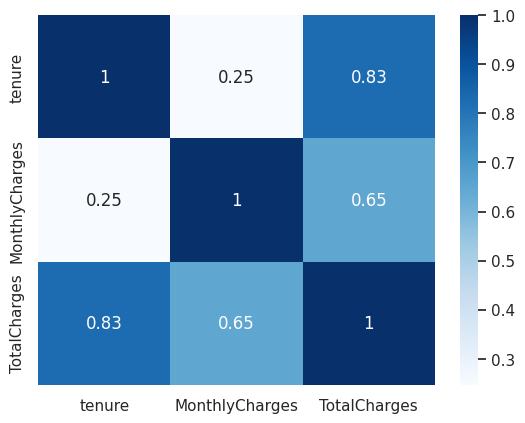

In [17]:
sns.heatmap(data=telecom_customer_data_no_customerid[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True, cmap='Blues');

* **Inference**: As tenure and monthly charges increase, the total charges also increase

### Finding correlation between categorical variables

* **Note** : The variables we have here are nominal variables. Nominal variables are those categorical variables which don't have natural ordering. For example, gender, race and so on.

* Cramer's V: We use this metric to find correlation between nominal variables

**TO DO: Read more about cramer's V**

In [18]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
    """
    chi2 = chi2_contingency(contingency_table)[0]
    
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5


def categorical_corr_matrix(df):
    """
        Computes corrected Cramer's V statistic between
        all the categorical variables in the dataframe
    """
    df = df.select_dtypes(include='category')
    cols = df.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            
            # This creates contigency table between two columns
            df_crosstab = pd.crosstab(df[col1], df[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(df_crosstab)
           
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

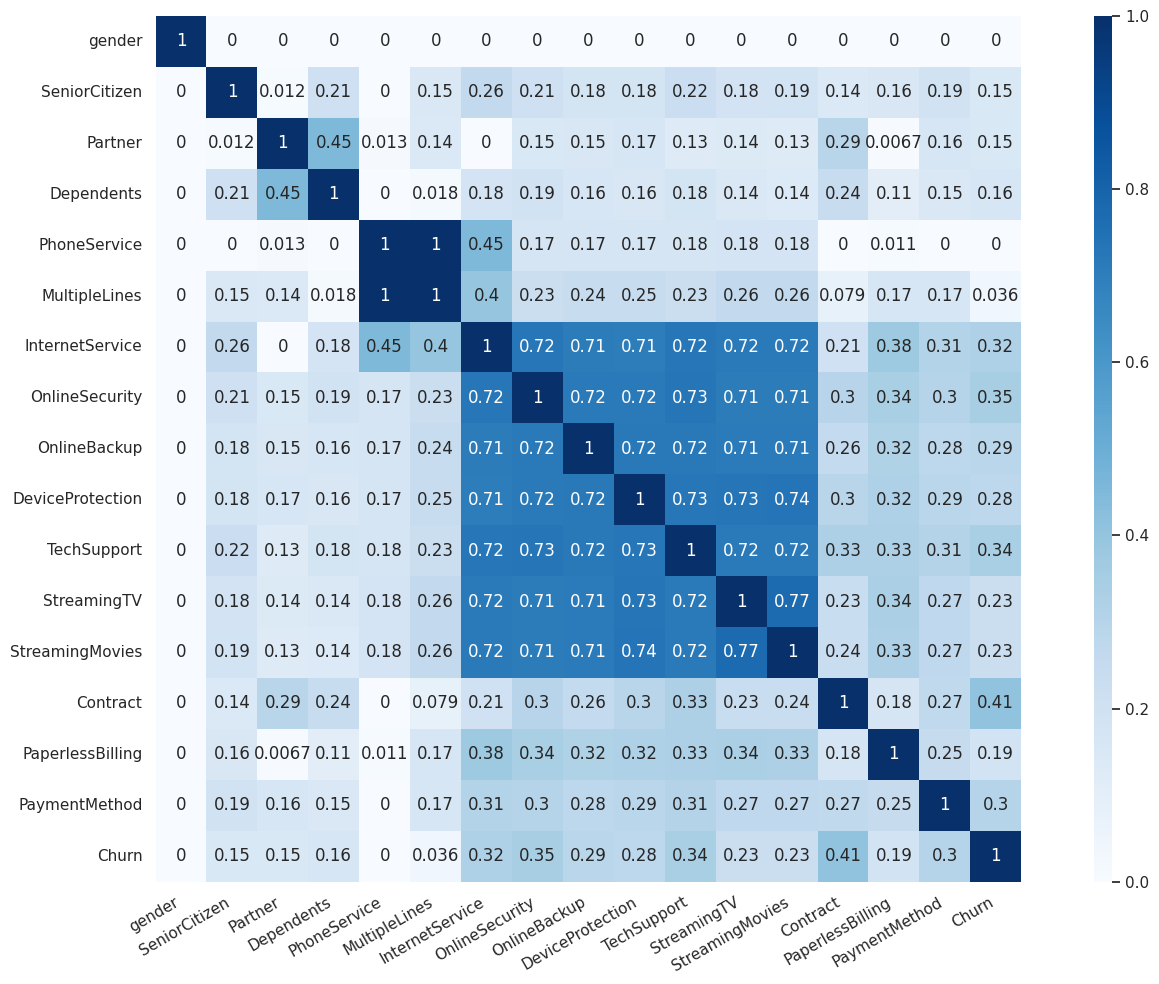

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(categorical_corr_matrix(telecom_customer_data_no_customerid), annot=True, cmap='Blues', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

* **Inference**: There is correlation between phone service and multiple lines as people without phone service cannot have multiple lines. Correlation can also be seen between internet service and online security, device protection, tech support etc as seen in the middle part of the plot

## Let's look into the data to understand and pick patterns

### A. Demographics of the population

**Gender Distribution** - About half of the customers in our data set are male while the other half are female

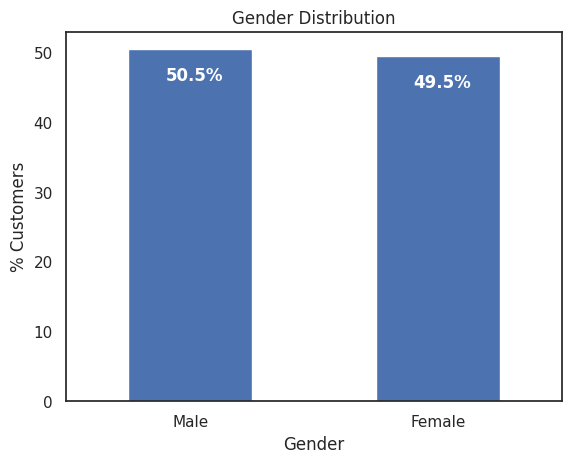

In [20]:
ax = (telecom_customer_data['gender'].value_counts()*100.0 /len(telecom_customer_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0)
                                                                

ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')


for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


Text(0.5, 1.0, '% of Senior Citizens')

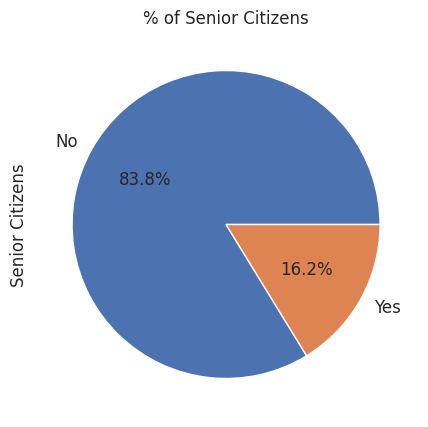

In [21]:
ax = (telecom_customer_data['SeniorCitizen'].value_counts()*100.0 /len(telecom_customer_data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

In [22]:
after_melting = pd.melt(telecom_customer_data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
after_melting_count = after_melting.groupby(['variable','value']).count().unstack()
after_melting_count = after_melting_count*100/len(telecom_customer_data)


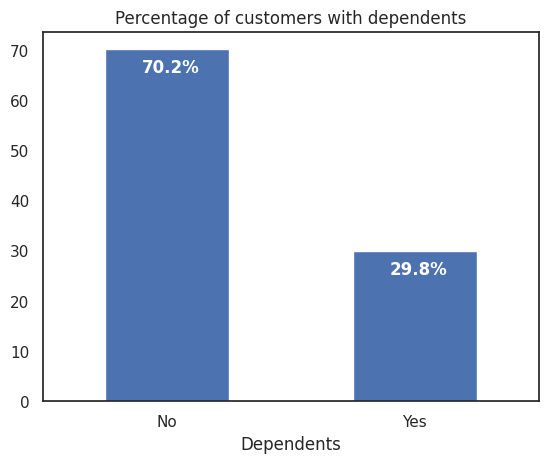

In [23]:
ax=after_melting_count.customerID.loc['Dependents',:].plot.bar(rot=0)
ax.set_xlabel("Dependents")
ax.set_title("Percentage of customers with dependents")
for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


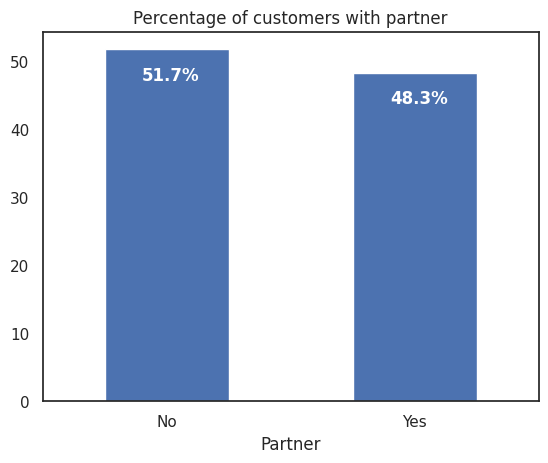

In [24]:
ax=after_melting_count.customerID.loc['Partner',:].plot.bar(rot=0)
ax.set_xlabel("Partner")
ax.set_title("Percentage of customers with partner")
for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

4. **Customers with partners and dependents combined**

In [25]:
partner_dependents = telecom_customer_data.groupby(['Partner','Dependents']).size().unstack()



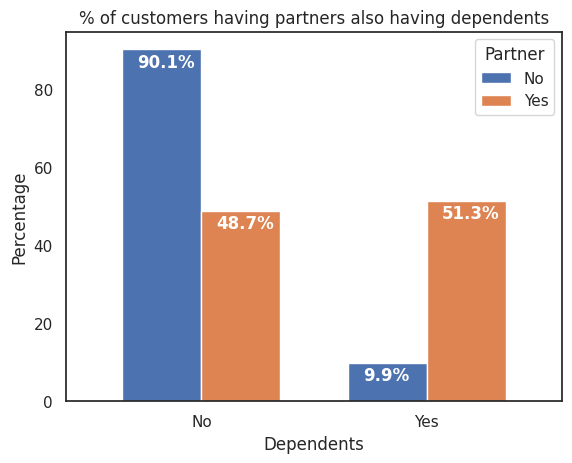

In [26]:
ax=(partner_dependents.T*100/partner_dependents.T.sum(axis=0)).plot.bar(width=0.7,rot=0)

ax.set_ylabel("Percentage")
ax.set_title("% of customers having partners also having dependents")

for i in ax.patches:
    
    ax.text(i.get_x()+.067, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

* **Inference** : Approx 50% of Customers who have partners also have dependents. Of the customers that don't have partners, about 90% of them also don't have dependents

### B.) Customer and his/her relationship with the company

**1. Tenure:**  

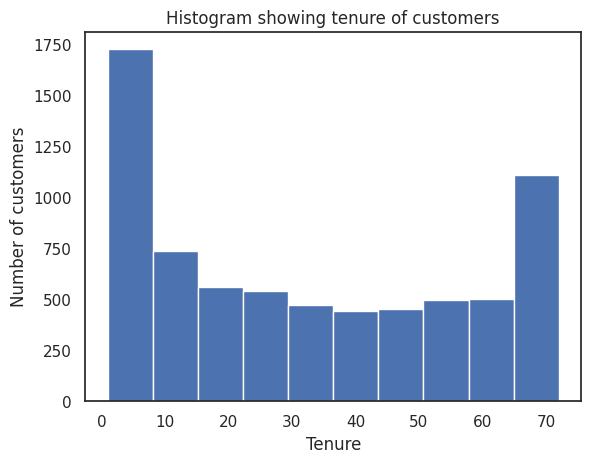

In [27]:
plt.hist(telecom_customer_data['tenure'],bins=10)
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Histogram showing tenure of customers")
plt.show()

In [28]:

telecom_customer_data['tenure'].value_counts().sort_values(ascending=False)[:2]

1     613
72    362
Name: tenure, dtype: int64

* **Inference** : Looking at the above plot, we can say that the number of customers who are associated with the company for a month is the most. The second highest number is when the tenure is 72 months.

**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts. 

Text(0.5, 1.0, 'Number of Customers by Contract Type')

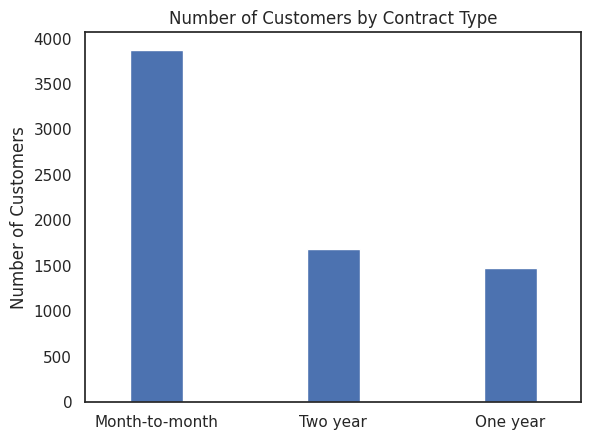

In [29]:
ax = telecom_customer_data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

* **Inference**: As we can see from this graph most of the customers are in the month to month contract and from the above graph on tenure, we saw that most of the customers had been with the company for about a month until the end of the quarter.



3. **Understanding relationship between contracts and tenure**

<ipython-input-30-18e6eaaea692>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract']=='Month-to-month']['tenure'],
<ipython-input-30-18e6eaaea692>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_customer_data[telecom_custome

Text(0.5, 1.0, 'Two Year Contract')

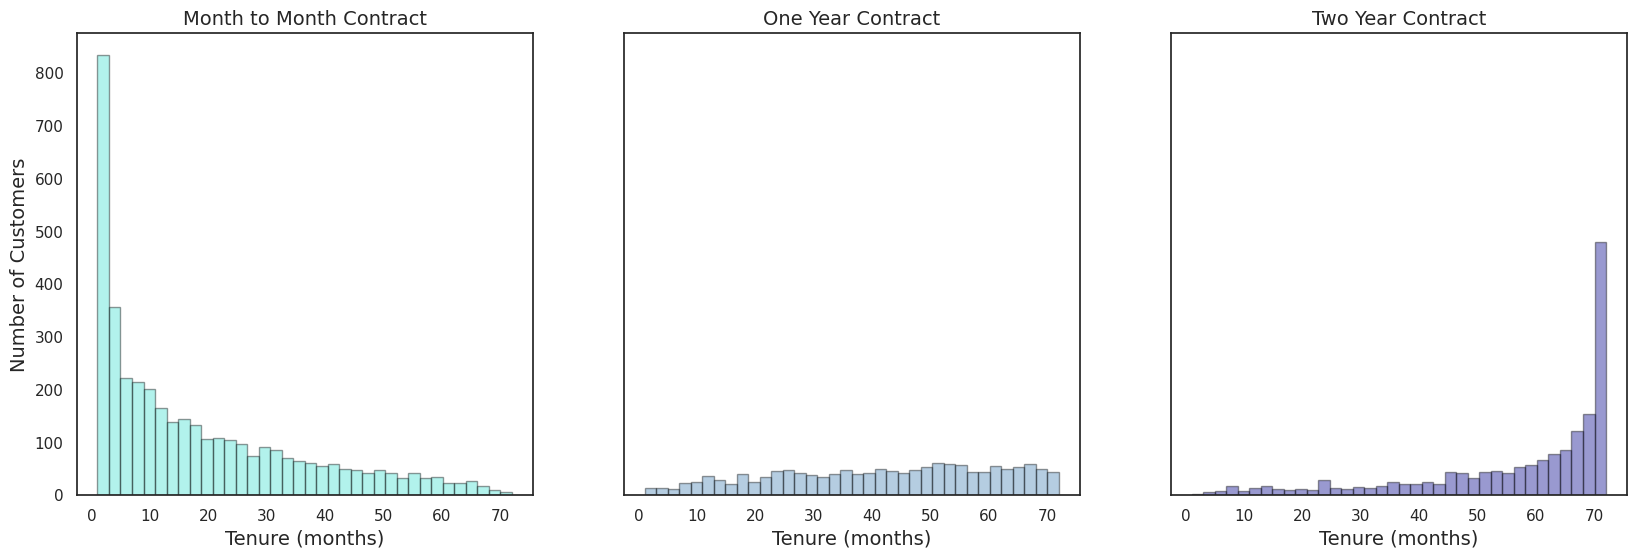

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers',size = 14)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Month to Month Contract',size = 14)

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14)

* **Inference** : Most of the customers with a month to month contract have less tenure. The thing to note here is that as the tenure is increasing, the number of customers with this contract type are decreasing.For most of the customers with a two year contract, the thing to note is that as the tenure is increasing, the number of customers with this contract type is increasing. So customers with a contract type of 2 years are more loyal to the company.



###  C. Let us now look at the distribution of various services used by customers

In [31]:

telecom_customer_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

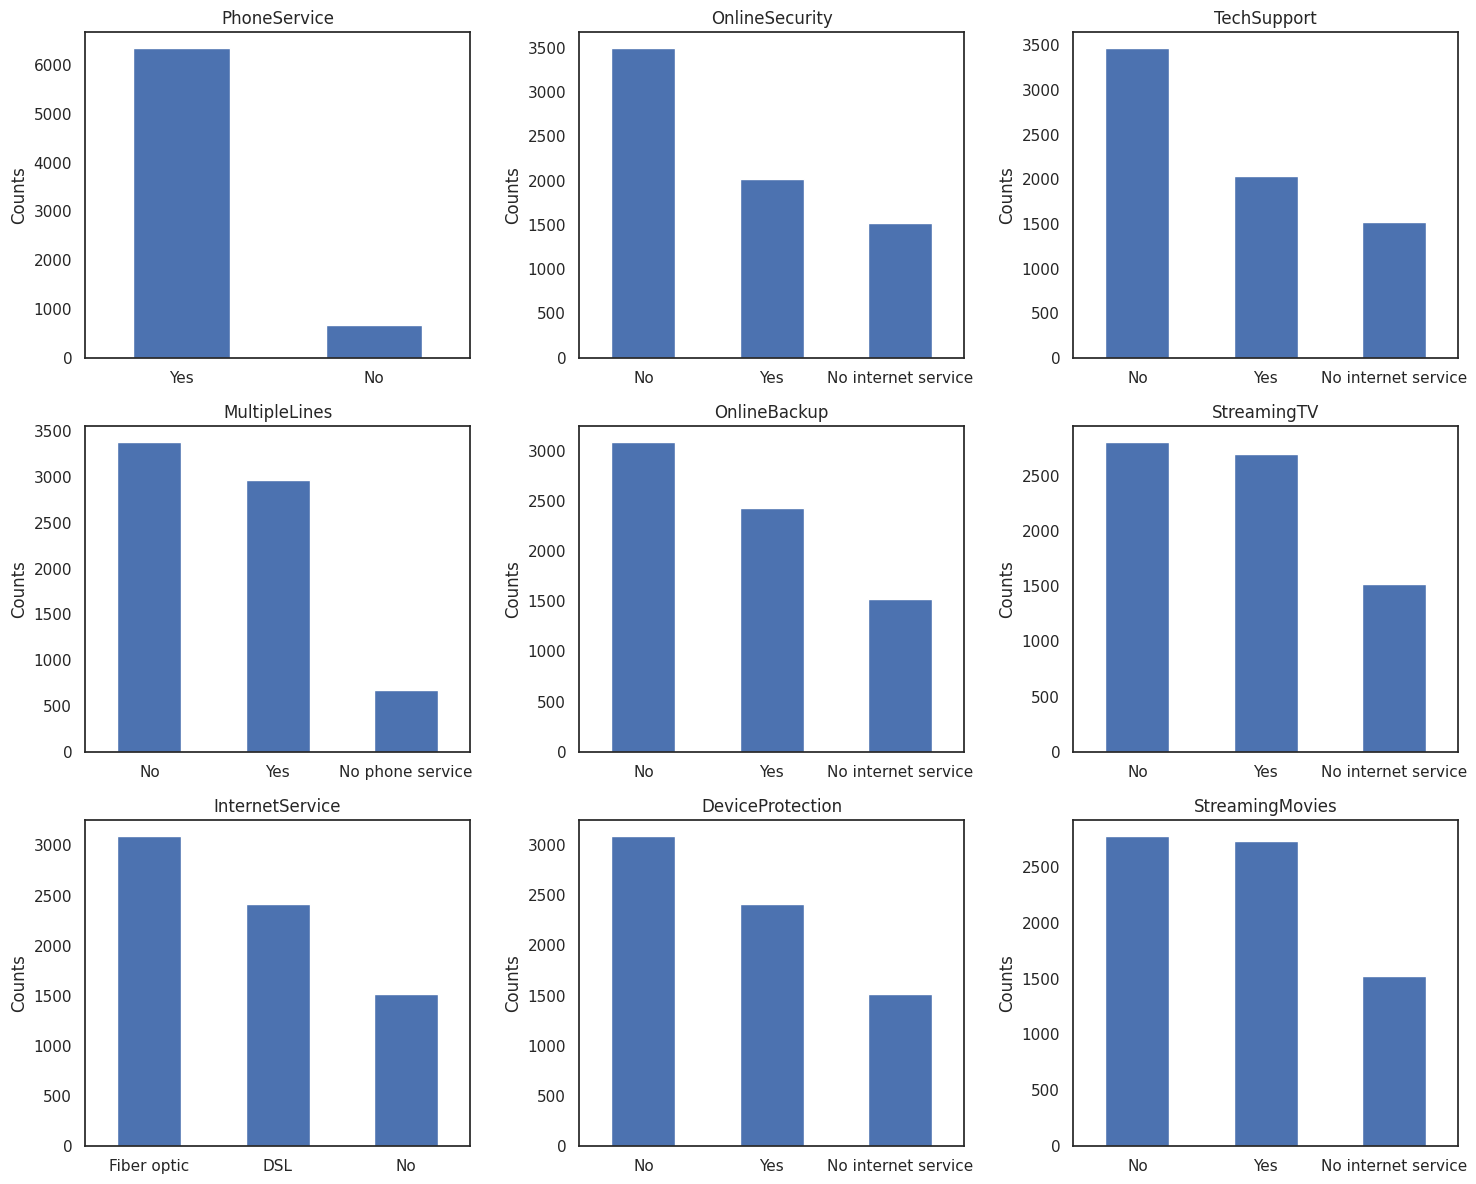

In [32]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_customer_data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_customer_data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_customer_data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
    ax.set_ylabel("Counts")
plt.tight_layout()

### D. Relationship between churn and other predictors

1. **Lets first look at the churn rate in our data**

Text(0.5, 1.0, 'Churn Rate for the company')

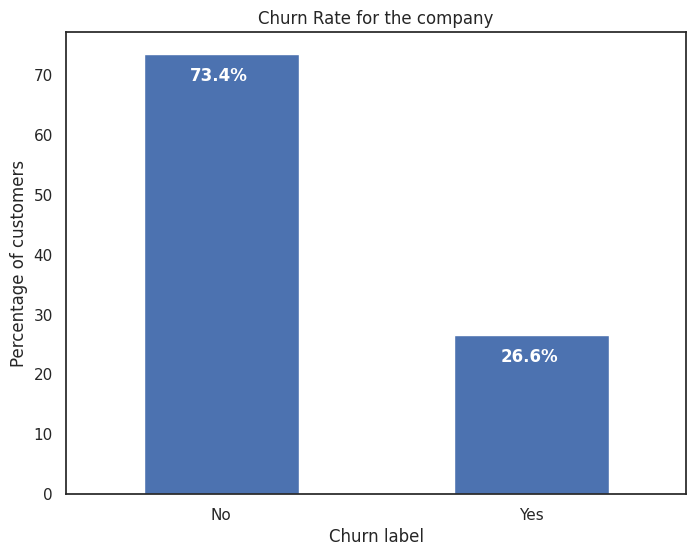

In [33]:
ax = (telecom_customer_data['Churn'].value_counts()*100.0 /len(telecom_customer_data)).plot(kind='bar',
                                                                          rot = 0,
                                                                         figsize = (8,6))
for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
    
ax.set_xlabel("Churn label")
ax.set_ylabel("Percentage of customers")
ax.set_title("Churn Rate for the company")


* **Interpretation** : The data is imbalanced. We have approx 70% of the customers who don't churn

2. **Churn vs Tenure** : As we can see form the below plot, customers who have been with the company for a longer tenure, don't churn. However, there are outliers i.e there are people who churn and who have been with the company for long


<ipython-input-34-a7ff28b99673>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grouped.get_group('No')[cols[0]], bins=20, ax=axes, label='N')
<ipython-input-34-a7ff28b99673>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grouped.get_group('Yes')[cols[0]], bins=20, ax=axes, label='Y')


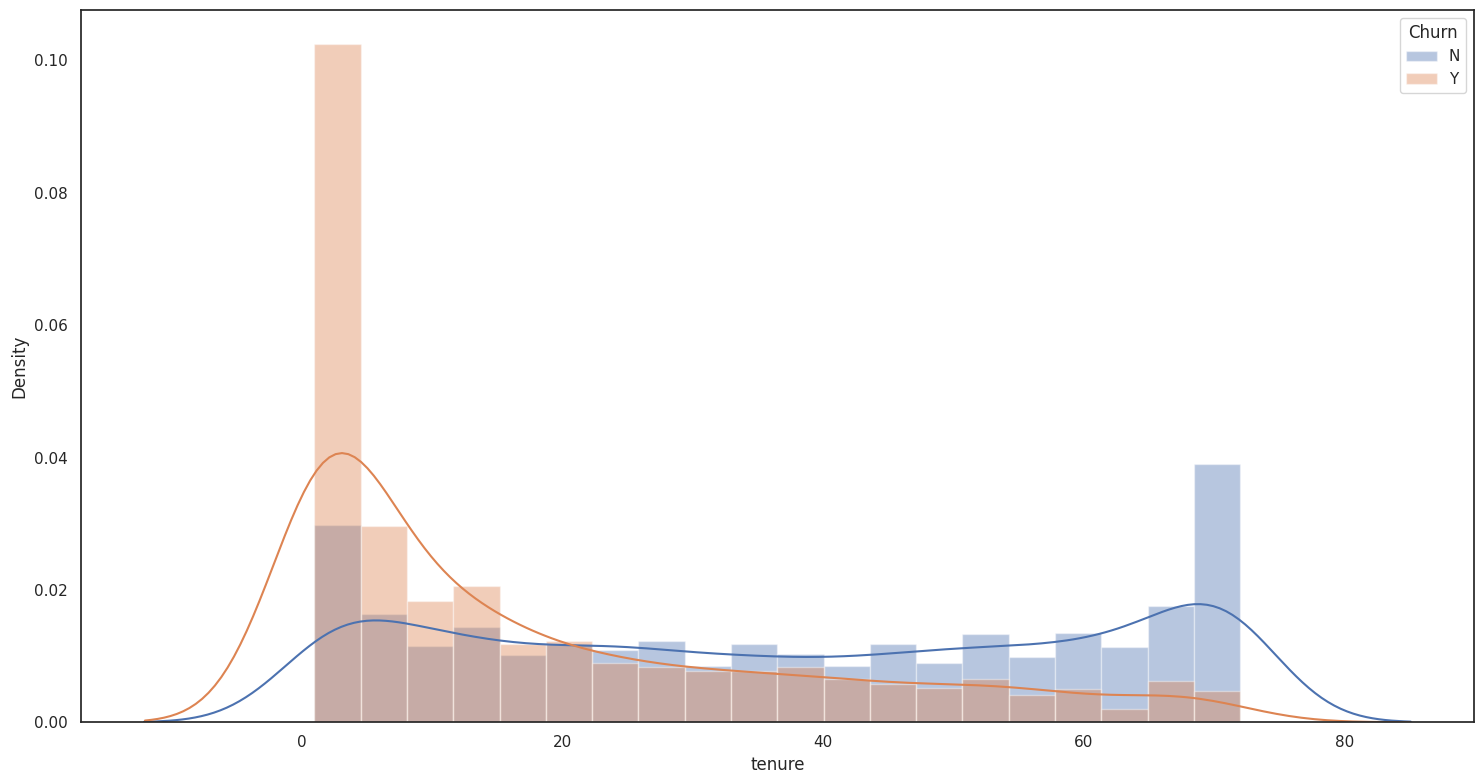

In [34]:
df_grouped = telecom_customer_data.groupby(by='Churn')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

cols = ['tenure']
sns.distplot(df_grouped.get_group('No')[cols[0]], bins=20, ax=axes, label='N')
sns.distplot(df_grouped.get_group('Yes')[cols[0]], bins=20, ax=axes, label='Y')
axes.legend(title='Churn')

fig.tight_layout()

<Axes: xlabel='Churn', ylabel='tenure'>

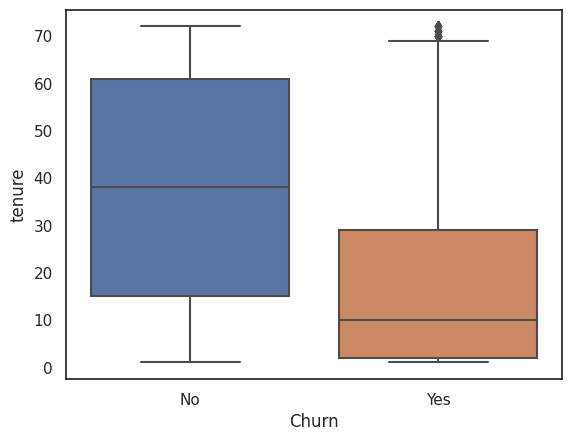

In [35]:
sns.boxplot(x = telecom_customer_data.Churn, y = telecom_customer_data.tenure)

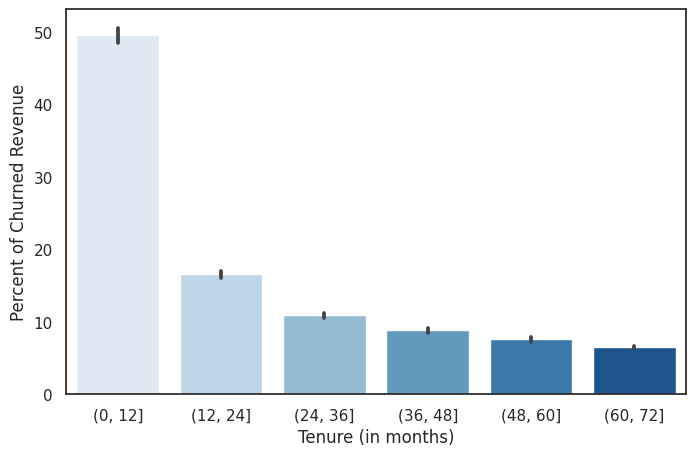

In [36]:
churned_users = telecom_customer_data[telecom_customer_data['Churn']=="Yes"]
bins = [(0, 12), (12, 24), (24, 36), (36, 48), (48, 60), (60, 72)]
binned_tenure = pd.cut(list(churned_users['tenure']),
                       bins=pd.IntervalIndex.from_tuples(bins))
revenue_share = churned_users['MonthlyCharges'] / churned_users['MonthlyCharges'].sum()
temp_df = pd.DataFrame(data={'tenure':binned_tenure, 
                             'revenue_share(%)': revenue_share * 100})


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
sns.barplot(x='tenure', y='revenue_share(%)', data=temp_df,
            estimator=np.sum, palette='Blues', ax=ax)
ax.set_xlabel('Tenure (in months)')
ax.set_ylabel('Percent of Churned Revenue');



* **Inference** : Revenue contribution is the most from customers whose tenure is less (0-12) months. Churn among these customers is also more. These customers have to be retained by the business to prevent lower churn and to keep the revenue coming.

In [37]:
# These are the outliers based on the above boxplot
telecom_customer_data[(telecom_customer_data['Churn']=="Yes") & (telecom_customer_data['tenure']>70)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
975,2834-JRTUA,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,108.05,7532.15,Yes
3040,7317-GGVPB,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.60,7690.90,Yes
3111,8809-RIHDD,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,103.40,7372.65,Yes
3439,0917-EZOLA,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.15,7689.95,Yes
3890,3886-CERTZ,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes
4149,6559-ILWKJ,Male,0,Yes,No,71,No,No phone service,DSL,No,...,No,No,Yes,Yes,Two year,No,Electronic check,49.35,3515.25,Yes
4513,8580-QVLOC,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.45,6440.25,Yes
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
5702,5287-QWLKY,Male,1,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,7548.10,Yes
6290,2530-ENDWQ,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),93.70,6585.35,Yes


*** Note: Ask about such cases and how to handle these cases**

**3. Churn by Contract Type**: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

Text(0.5, 1.0, 'Churn by Contract Type')

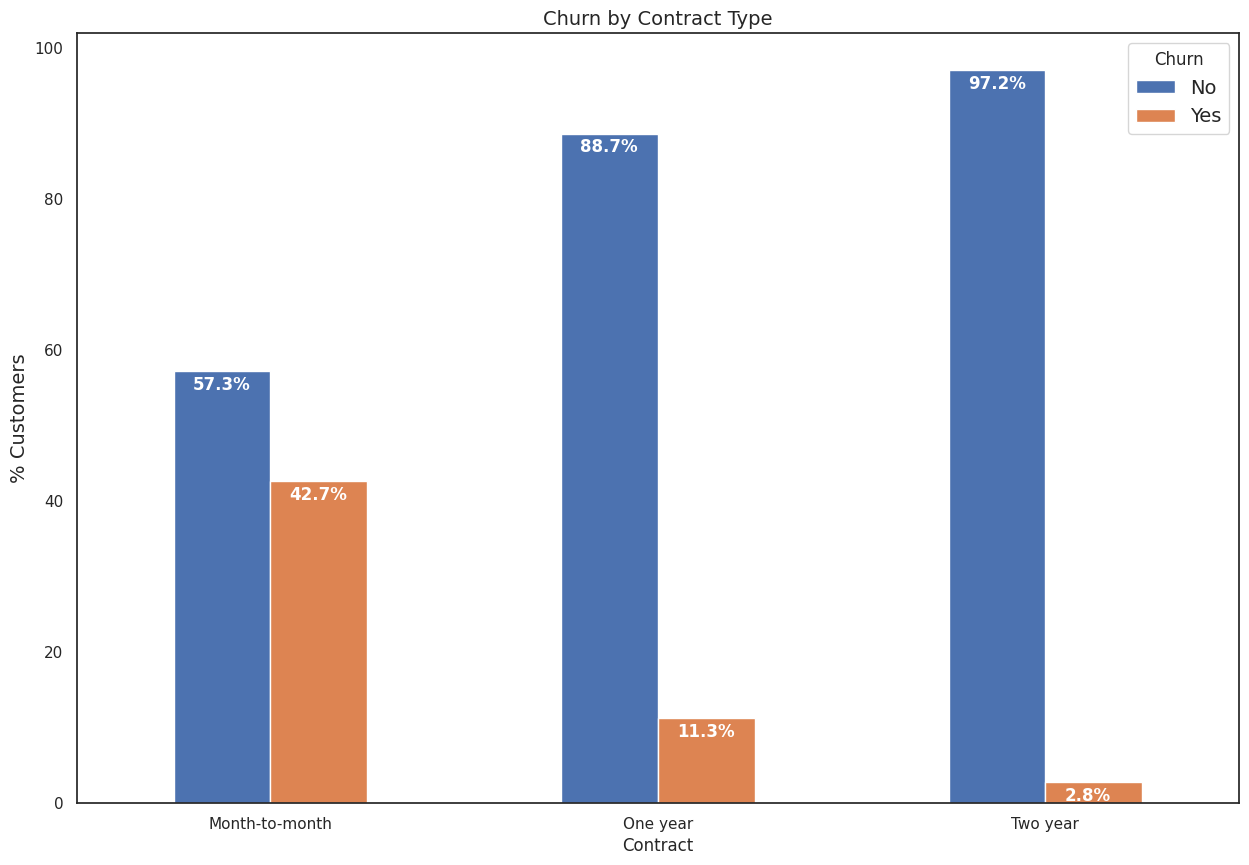

In [38]:
contract_churn = telecom_customer_data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                rot = 0, 
                                                                figsize = (15,10))


for i in ax.patches:
    
    ax.text(i.get_x()+.05, i.get_height()-2.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='White',
           weight = 'bold')

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)


**4. Churn by Seniority**: Senior Citizens have almost double the churn rate than younger population.

Text(0.5, 1.0, 'Churn by Seniority')

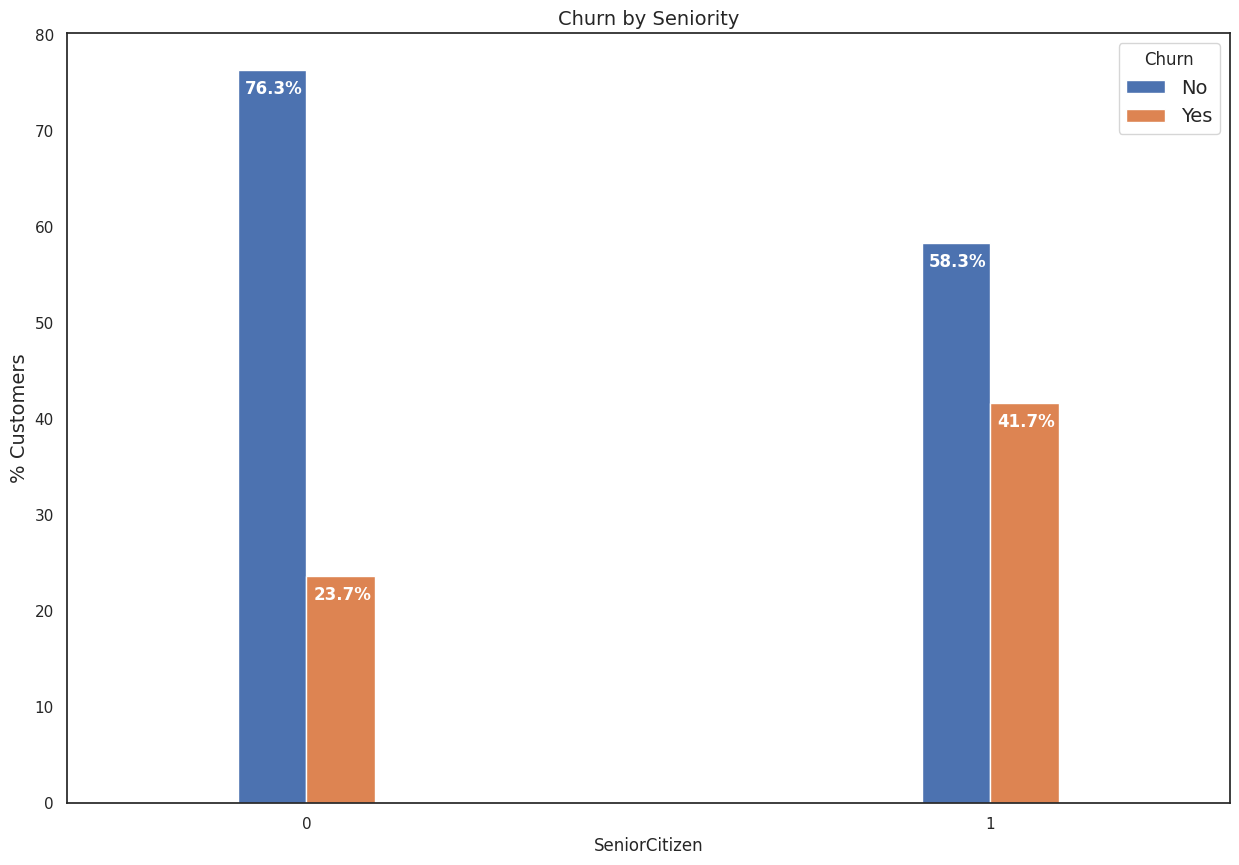

In [39]:
seniority_churn = telecom_customer_data.groupby(['SeniorCitizen','Churn']).size().unstack()


ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                rot = 0, 
                                                                figsize = (15,10))

for i in ax.patches:
    
    ax.text(i.get_x()+.01, i.get_height()-2.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='White',
           weight = 'bold')

ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Seniority',size = 14)
                                                                

**4. Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high, specifically between 70-120.

<ipython-input-40-27c2c7b7dd9c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grouped.get_group('No')[cols[0]], bins=20, ax=axes, label='N')
<ipython-input-40-27c2c7b7dd9c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grouped.get_group('Yes')[cols[0]], bins=20, ax=axes, label='Y')


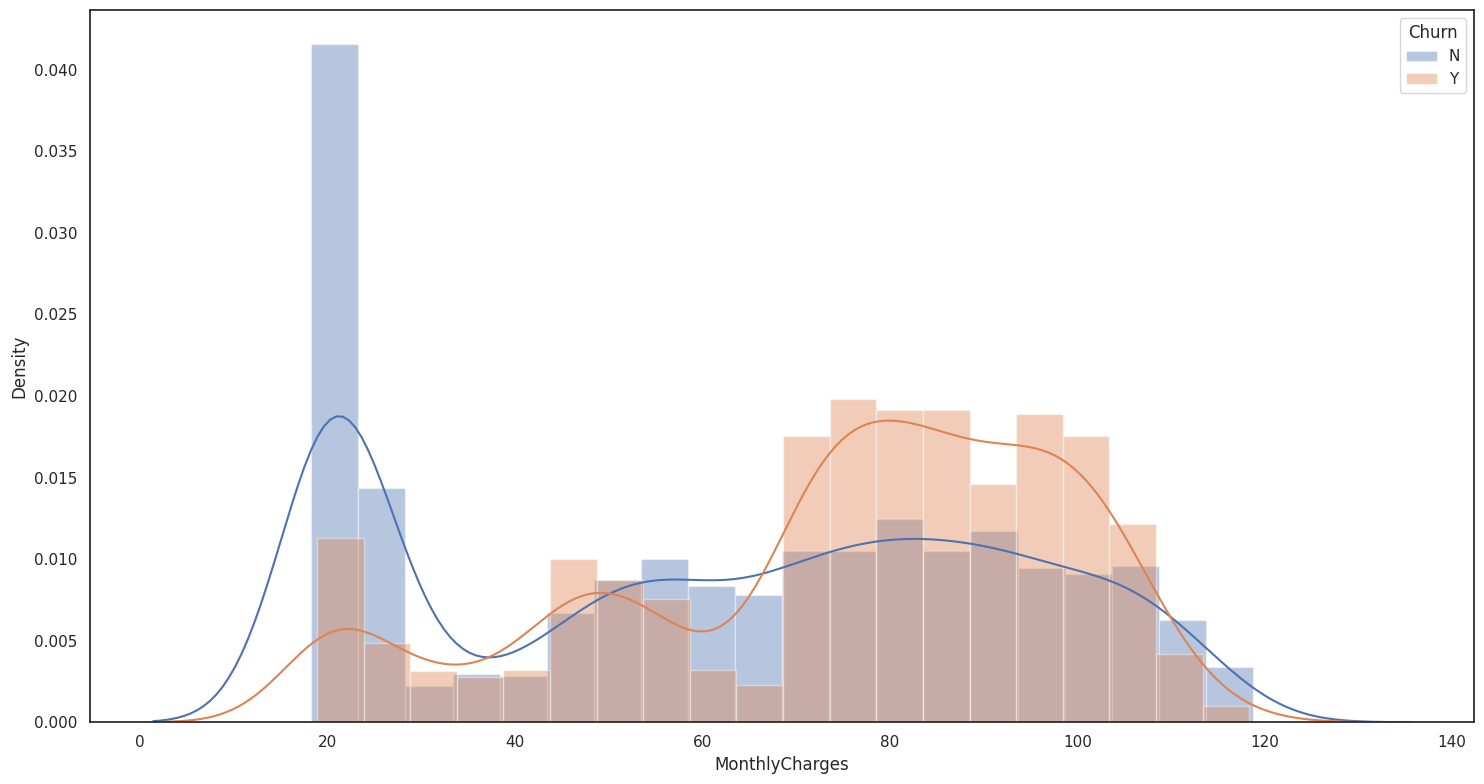

In [40]:
df_grouped = telecom_customer_data.groupby(by='Churn')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

cols = ['MonthlyCharges']
sns.distplot(df_grouped.get_group('No')[cols[0]], bins=20, ax=axes, label='N')
sns.distplot(df_grouped.get_group('Yes')[cols[0]], bins=20, ax=axes, label='Y')
axes.legend(title='Churn')

fig.tight_layout()


**v.) Churn by Total Charges**: It seems that there is higer churn when the total charges are lower.

<ipython-input-41-5bdfbf9aaed3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grouped.get_group('No')[cols[0]], bins=20, ax=axes, label='N')
<ipython-input-41-5bdfbf9aaed3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_grouped.get_group('Yes')[cols[0]], bins=20, ax=axes, label='Y')


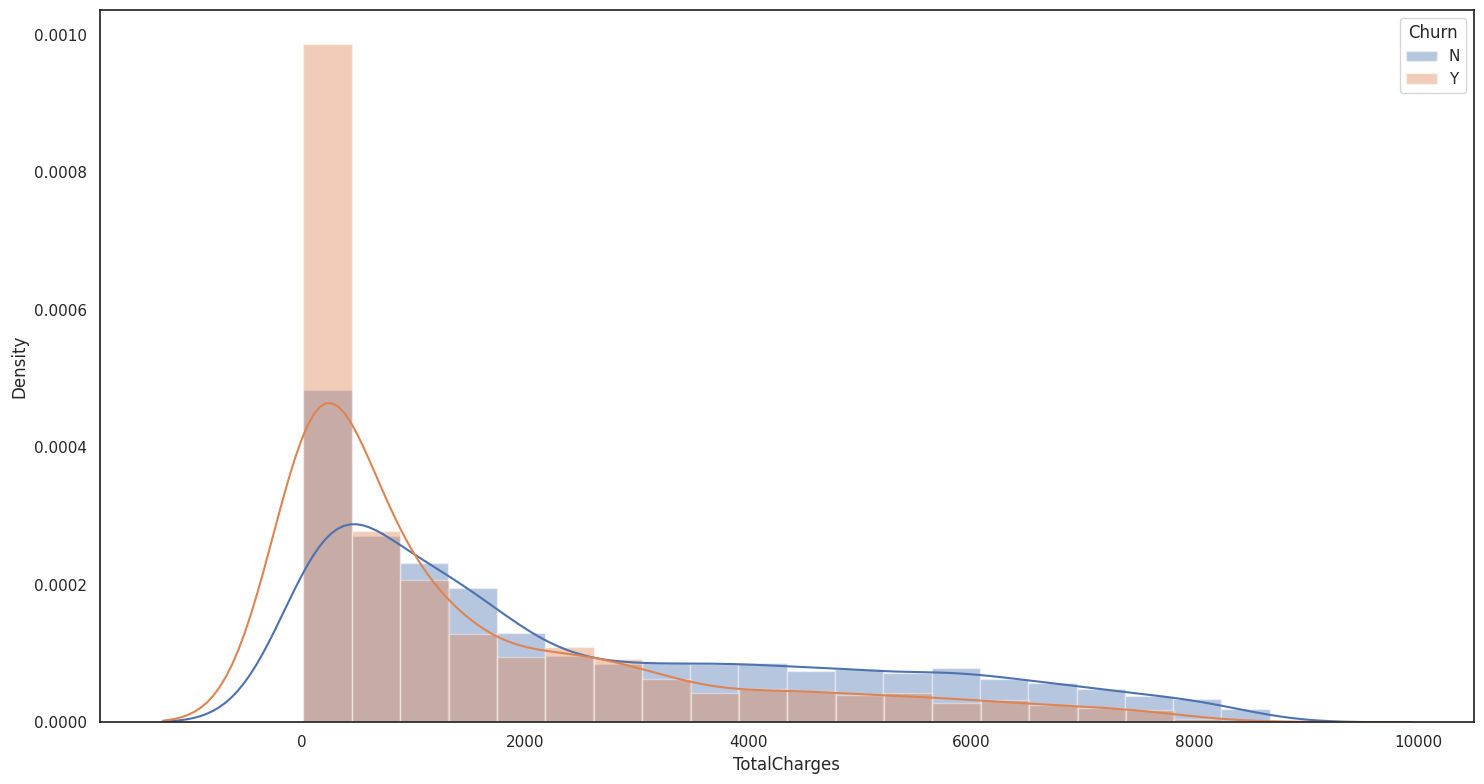

In [41]:
df_grouped = telecom_customer_data.groupby(by='Churn')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

cols = ['TotalCharges']
sns.distplot(df_grouped.get_group('No')[cols[0]], bins=20, ax=axes, label='N')
sns.distplot(df_grouped.get_group('Yes')[cols[0]], bins=20, ax=axes, label='Y')
axes.legend(title='Churn')

fig.tight_layout()

In [42]:
# Selecting the predictors and the response variable
x = telecom_customer_data_no_customerid.iloc[:, :-1]
y = telecom_customer_data_no_customerid['Churn']


In [43]:
# Selecting categorical and numerical variable
categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

### Train test split

In [44]:
from sklearn.model_selection import train_test_split

# Data split for all the other methods
data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


# For CatBoost and Naive Bayes
data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
x_train_cat, x_test_cat, y_train_cat, y_test_cat = data_splits


# Save the non-scaled version of monthlycharges and totalcharges to compare classifiers
x_test_charges = np.array(x_test[['MonthlyCharges', 'TotalCharges']], copy=True)

list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(7032, 19), (7032,), (5274, 19), (1758, 19), (5274,), (1758,)]

* **Note** : We are using stratify because we have an imbalanced dataset and we want to have similar distribution of churn value in train and test set as the original dataset

### Data Preprocessing for modeling

* **Note**: 
    
    1. Catboost doesn't require data preprocessing.
    2. Naive Bayes requires different kind of preprocessing.
    3. All other algorithms require preprocessing


* **Note**:

    1. Standardisation: We need to standardise numerical columns because if a column has large values, that column might dominate the model fitting process creating a bias.

    2. This must be performed after train test split is done to avoid data leakage

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

x_train=pd.get_dummies(x_train,drop_first=True,dtype=int,columns=categorical_columns)
x_test=pd.get_dummies(x_test,drop_first=True,dtype=int,columns=categorical_columns)


In [46]:
# Looking at dataframe after onehot encoding
x_train.dtypes

tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                int64
SeniorCitizen_1                            int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes                            int64
StreamingTV_No inter

In [47]:
# Storing one hot encoded columns
cat_after_one_hot=x_train.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

In [48]:
list(cat_after_one_hot.columns)

['gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [49]:
# Numerical columns
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [50]:
feature_names=list(cat_after_one_hot.columns)+numeric_columns

In [51]:
# We are using column transformer to scale the numerical columns
transformer = [('standard_scaler', StandardScaler(), numeric_columns)]


x_trans = ColumnTransformer(transformer, remainder='passthrough')


## Applying Column Transformer
x_train = x_trans.fit_transform(x_train)
x_test = x_trans.transform(x_test)

## Label encoding
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)

### We will be using cost sensitive learning for the imbalanced class we are working on. A great explanation can be found [here](https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/)

* **Note**: The basic idea is that misclassification of minority class will cost the ml model more than missclassifying majority class. While using sklearn, cost sensitive learning ca be enabled by setting **class_weight='balanced'**

## Modeling

In [52]:
# Utility functions:

def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    
    traintime=0

    try:
      if refit:
        raise NotFittedError
      
      y_pred_train=clf.predict(x_train)
    
    except NotFittedError:

      start=timeit.default_timer()

      # Training part
      if sample_weight is not None:
        print(1)
        clf.fit(x_train,y_train,sample_weight=sample_weight)
      else:
        clf.fit(x_train,y_train)

      end=timeit.default_timer()

      traintime=end-start

      y_pred_train=clf.predict(x_train)
    
    train_accuracy_score=accuracy_score(y_train,y_pred_train)

    return clf, y_pred_train, train_accuracy_score, traintime


def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))


def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig


def report(clf, x_train, y_train, x_test, y_test, sample_weight=None,
           refit=False, importance_plot=False, confusion_labels=None,
           feature_labels=None, verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                                     sample_weight=sample_weight,
                                                     refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    
    roc_auc = roc_auc_score(y_test, y_probs)
    
    
    # Model Memory
    model_mem = round(model_memory_size(clf) / 1024, 2)
    
    
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("------------------------------------------")
    print(" Area Under ROC: ", roc_auc)
    print("------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))

    
    ## Dump to report_dict
    dump = dict(clf=clf, train_acc=train_acc, train_time=train_time,
                train_predictions=train_predictions, test_acc=test_acc,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep,roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf,dump


      

### Naive bayes: 

Since majority of the features are categorical and follow a categorical distribution, we will use CategoricalNB. Continuous features will be discretized.

When bins to discretize numerical columns is 8

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.027 seconds
 Testing Time: 0.002 seconds
------------------------------------------
Train Accuracy:  0.7389078498293515
 Test Accuracy:  0.7389078498293515
------------------------------------------
 Area Under ROC:  0.8213028096009766
------------------------------------------
Model Memory Size: 6.09 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1291
       Churn       0.51      0.79      0.62       467

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.74      0.75      1758


===========================

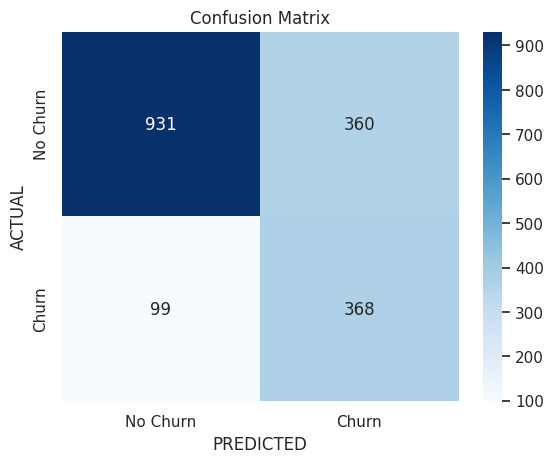

In [53]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB 
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder

confusion_lbs = ['No Churn', 'Churn']

## Discretize 'monthlycharges' and 'totalcharges' into 3bins

print(f"When bins to discretize numerical columns is 8")
kbn = KBinsDiscretizer(n_bins=8, encode='ordinal')
ode = OrdinalEncoder(dtype=np.int64)
nb_trans = [('ordinal', ode, categorical_columns),
            ('kbn', kbn, numeric_columns[1:])]
nb_col_trans = ColumnTransformer(nb_trans, remainder='passthrough')

## Applying Column Transformer
x_train_nb = nb_col_trans.fit_transform(x_train_cat)
x_test_nb = nb_col_trans.transform(x_test_cat)

nb_clf = CategoricalNB()

nb_clf,nb_report= report(nb_clf, x_train_nb, y_train,
                          x_test_nb, y_test, refit=True,
                          confusion_labels=confusion_lbs)

***Note***: 8 bins to discretize the numerical columns gave higher f1-score. Precision and recall values were also better than the rest. In this setting model is not overfitting 

### Logistic Regression


=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 15.069 seconds
 Testing Time: 0.007 seconds
------------------------------------------
Train Accuracy:  0.751611679939325
 Test Accuracy:  0.7514220705346986
------------------------------------------
 Area Under ROC:  0.8451800224582309
------------------------------------------
Model Memory Size: 14.15 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1291
       Churn       0.52      0.78      0.63       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758


================================> CONFUSION MATRIX <=====================

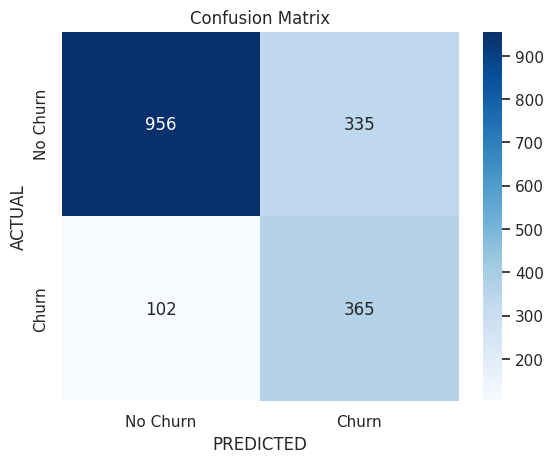

In [54]:
from sklearn.linear_model import LogisticRegressionCV

logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500,
                                scoring='f1', penalty='l1', solver='liblinear',
                                n_jobs=-1, random_state=0, refit=True, verbose=0)

logit_cv, logit_report = report(logit_cv, x_train, y_train,
                                x_test, y_test, refit=True,
                                feature_labels=feature_names,
                                confusion_labels=confusion_lbs)

### KNN algorithm


=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.002 seconds
 Testing Time: 1.698 seconds
------------------------------------------
Train Accuracy:  0.7942737959802806
 Test Accuracy:  0.7974971558589306
------------------------------------------
 Area Under ROC:  0.8381365307838653
------------------------------------------
Model Memory Size: 1277.99 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.86      1291
       Churn       0.63      0.56      0.60       467

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758


================================> CONFUSION MATRIX <===================

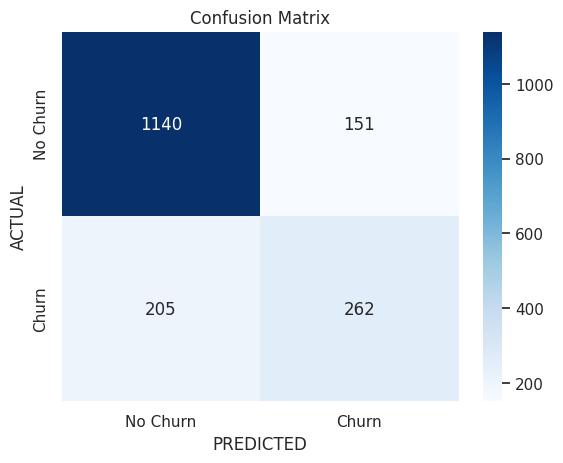

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=200, p=1,
                          weights='uniform', n_jobs=-1)



knn, knn_report = report(knn, x_train, y_train,
                        x_test, y_test,
                        importance_plot=True,
                        feature_labels=feature_names,
                        confusion_labels=confusion_lbs)



### Decision tree algorithm


=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.015 seconds
 Testing Time: 0.001 seconds
------------------------------------------
Train Accuracy:  0.7533181645809632
 Test Accuracy:  0.7502844141069397
------------------------------------------
 Area Under ROC:  0.8219090491410639
------------------------------------------
Model Memory Size: 3.12 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.89      0.75      0.82      1291
       Churn       0.52      0.74      0.61       467

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.79      0.75      0.76      1758


================================> CONFUSION MATRIX <======================

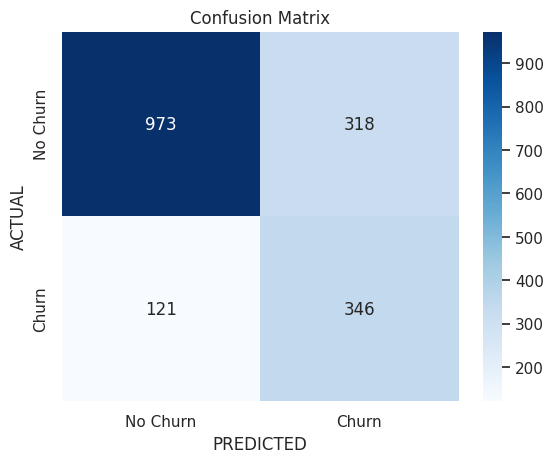

In [56]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(class_weight='balanced',
                                       criterion='entropy',
                                       max_depth=4,
                                       random_state=0)

decision_tree, decision_tree_report = report(decision_tree, x_train, y_train,
                                             x_test, y_test,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

### Decision tree with bagging

> Understand it fully



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.5 seconds
 Testing Time: 0.084 seconds
------------------------------------------
Train Accuracy:  0.7656427758816837
 Test Accuracy:  0.7639362912400455
------------------------------------------
 Area Under ROC:  0.8363509853258515
------------------------------------------
Model Memory Size: 81.67 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.89      0.78      0.83      1291
       Churn       0.54      0.72      0.62       467

    accuracy                           0.76      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.79      0.76      0.77      1758


================================> CONFUSION MATRIX <=======================

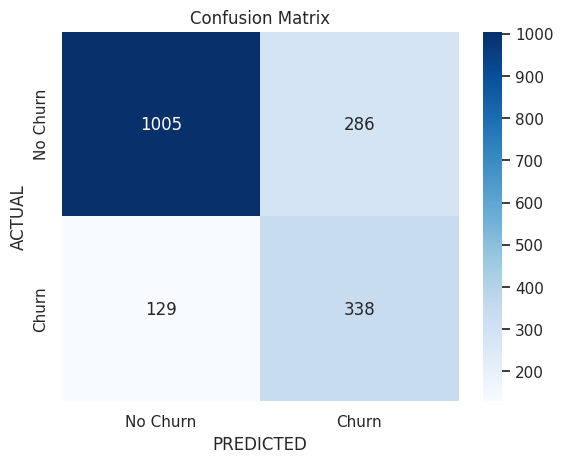

In [57]:
from sklearn.ensemble import BaggingClassifier

bagging_dtree = DecisionTreeClassifier(max_depth=2, class_weight='balanced',
                                       criterion='entropy', random_state=0)

bagging_clf = BaggingClassifier(base_estimator=bagging_dtree,
                                max_samples=110, n_estimators=80,
                                max_features=15, n_jobs=-1,
                                random_state=0)

bagging_clf, bagging_clf_report = report(bagging_clf, x_train, y_train,
                                         x_test, y_test,
                                         feature_labels=feature_names,
                                         confusion_labels=confusion_lbs)

### Random forest


=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.446 seconds
 Testing Time: 0.046 seconds
------------------------------------------
Train Accuracy:  0.7125521425862723
 Test Accuracy:  0.7184300341296929
------------------------------------------
 Area Under ROC:  0.8336117114532
------------------------------------------
Model Memory Size: 79.7 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.92      0.67      0.78      1291
       Churn       0.48      0.85      0.62       467

    accuracy                           0.72      1758
   macro avg       0.70      0.76      0.70      1758
weighted avg       0.81      0.72      0.73      1758


================================> CONFUSION MATRIX <=========================

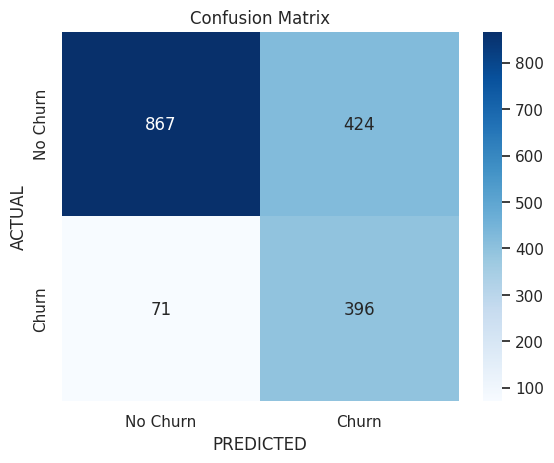

In [58]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                                       max_depth=2, n_estimators=100,
                                       n_jobs=-1, random_state=0)

random_forest, random_forest_report = report(random_forest, x_train, y_train,
                                             x_test, y_test,
                                             importance_plot=True,
                                             feature_labels=feature_names,
                                             confusion_labels=confusion_lbs)

### Decision tree with adaboost

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 2.786 seconds
 Testing Time: 0.191 seconds
------------------------------------------
Train Accuracy:  0.7571103526734926
 Test Accuracy:  0.7468714448236633
------------------------------------------
 Area Under ROC:  0.8490786983514598
------------------------------------------
Model Memory Size: 148.18 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.91      0.73      0.81      1291
       Churn       0.52      0.79      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758


================================> CONFUSION MATRIX <====================

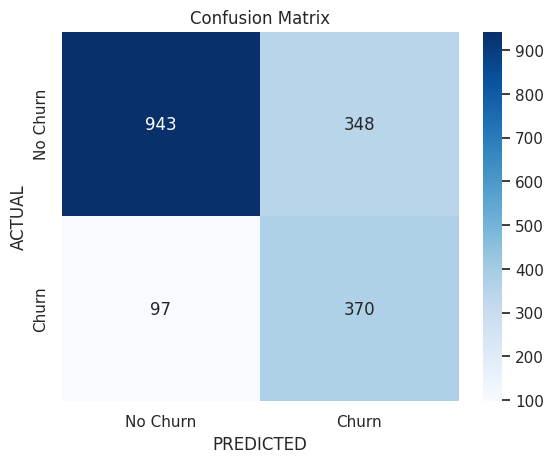

In [59]:
from sklearn.ensemble import AdaBoostClassifier

boosting_dtree = DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        max_depth=1, random_state=0)
adaboot = AdaBoostClassifier(base_estimator=boosting_dtree,
                             n_estimators=285, learning_rate=0.1,
                             random_state=0)

adaboot, adaboot_report = report(adaboot, x_train, y_train,
                                 x_test, y_test,
                                 importance_plot=True,
                                 feature_labels=feature_names,
                                 confusion_labels=confusion_lbs)

### XGBoost classifier


=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0 seconds
 Testing Time: 0.005 seconds
------------------------------------------
Train Accuracy:  0.7523701175578309
 Test Accuracy:  0.7229806598407281
------------------------------------------
 Area Under ROC:  0.8225360219075564
------------------------------------------
Model Memory Size: 391.41 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.90      0.70      0.79      1291
       Churn       0.49      0.79      0.60       467

    accuracy                           0.72      1758
   macro avg       0.69      0.75      0.70      1758
weighted avg       0.79      0.72      0.74      1758


================================> CONFUSION MATRIX <========================

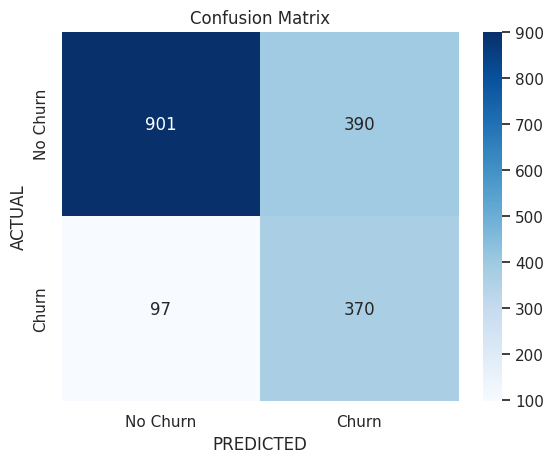

In [60]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

## Compute `class_weights` using sklearn
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

xgb_clf = XGBClassifier(learning_rate=0.00001, random_state=0,
                        scale_pos_weight=cls_weight, n_jobs=-1)
xgb_clf.fit(x_train, y_train);

xgb_clf, xgb_report = report(xgb_clf, x_train, y_train,
                             x_test, y_test,
                             feature_labels=feature_names,
                             confusion_labels=confusion_lbs)

### Comparative analysis

In [61]:
def compare_models(clf_reports=[], labels=[]):
   

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train Accuracy', 'Test Accuracy', 'Overfitting', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        train_acc = round(clf_reports[i]['train_acc'], 3)
        test_acc = round(clf_reports[i]['test_acc'], 3)
        clf_probs = clf_reports[i]['test_probs']
        roc_auc = clf_reports[i]['roc_auc']
        
        
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        
        table[clf_names[i]] = [train_acc, test_acc,
                               test_acc < train_acc,roc_auc] + true_positive_metrics
    
        
    table = pd.DataFrame(data=table, index=index)
    
    
    return table.T

In [62]:
report_list = [nb_report, logit_report, knn_report, decision_tree_report,               
               bagging_clf_report, random_forest_report, adaboot_report,
               xgb_report]

In [63]:

clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]
compare_table= compare_models(clf_reports=report_list, labels=clf_labels)

compare_table.sort_values(by=['Overfitting'])

,Train Accuracy,Test Accuracy,Overfitting,ROC Area,Precision,Recall,F1-score,Support
CategoricalNB,0.739,0.739,False,0.821303,0.505495,0.788009,0.6159,467
KNeighborsClassifier,0.794,0.797,False,0.838137,0.634383,0.561028,0.595455,467
RandomForestClassifier,0.713,0.718,False,0.833612,0.482927,0.847966,0.615385,467
LogisticRegressionCV,0.752,0.751,True,0.84518,0.521429,0.781585,0.625536,467
DecisionTreeClassifier,0.753,0.75,True,0.821909,0.521084,0.740899,0.611848,467
BaggingClassifier,0.766,0.764,True,0.836351,0.541667,0.723769,0.619615,467
AdaBoostClassifier,0.757,0.747,True,0.849079,0.51532,0.792291,0.624473,467
XGBClassifier,0.752,0.723,True,0.822536,0.486842,0.792291,0.603097,467


****

***Inference: Out of the models that do not overfit, f1-score is highest for categoricalNB. In terms of recall i.e correct identification of churn customers, random forest performs the best. If the company wants to identify and run programs to retain the potential churn customers, they should go with random forest.***

**Precision for random forest is less than precision from categoricalNB which indicates that false positives in random forest is more. If the company decides to go with random forest then, some no churn customers might also get included in programs meant to retain churn customers. This may lead to increase in spending.**

***Out of the models, which don't overfit, categorical naive bayes is giving better f1-score thus a good trade-off between precision and recall so it can be chosen.***

***

### Conclusion

This work was meant to gain understanding of churn in telecom sector. We dealt with imbalanced data, chose metric according to the business needs also keeping in mind that the data which we have is imbalanced

***

### References: 

1. https://www.kaggle.com/code/para24/churn-prediction-using-cost-sensitive-learning/notebook

2. https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction